In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Note: Throughout this exercise, we assume that passenger arrivals occur after we take the action of dispatching the shuttle or not dispatching it.

### 1) Enumeration 

In [2]:
#Set variables
K = 15
c_f = 100
c_h = 2
max_t = 501
gamma = 0.95
A = [0,1] #Defining action space (0- wait, 1 - dispatch shuttle)
n_states = 201 #0 to 200 people possibly waiting.

In [9]:
V = [[0]*n_states]*(max_t + 1) #Initialize V for first enumeration, stores V(s) at every t

201

In [70]:
def get_value(s_t, gamma, V_next):
#Function to get V(t) for S, given gamma and V_t+1 
    netval = []
    #Loop over actions
    for a_t in A:
        #Define reward portion
        if a_t == 1:
            
            reward = -(c_h * (s_t - min(K, s_t))) - c_f
            
        else:
            reward = -c_h * s_t
        sum_expval = 0
        #Get expectation of V_t+1(s')
        for A_t in list(range(1,6)):
            #For every possible environment (arrival number), get s'. Bound at 0 and 200.
            #THIS ASSUMES PEOPLE ARRIVE AFTER WE TAKE THE ACTION
            if a_t == 1:
                s_next = min((s_t - min(s_t, K) + A_t), 200)
            else:
                s_next = min(s_t + A_t, 200)
            
            sum_expval = sum_expval + 0.2 * (V_next[s_next])
        
        netval.append(reward + gamma*sum_expval)
    #Take the value that would result from the action that maximizes it  
    return max(netval)
                
    

In [71]:
#initialize values
V = [[0]*n_states]*(max_t + 1)
#Loop back to t = 0 from t=500
for t in range(max_t - 1, -1, -1):
    for s_t in range(0,201):
        #Get v_t for every s
        V[t][s_t] = get_value(s_t, gamma, V[t+1])

print(V[0])

[-576.6701677662147, -587.4441235164611, -597.7672857149968, -607.6052606041885, -616.8498182185808, -625.4396580837471, -633.6228379914422, -641.5734025493942, -648.8577600209874, -654.9790688206456, -660.1230257951484, -666.1658901372067, -672.8921633807195, -676.6701677662151, -676.6701677662151, -676.6701677662151, -687.4441235164616, -697.767285714997, -707.6052606041889, -716.849818218581, -725.4396580837473, -733.6228379914426, -741.5734025493945, -748.8577600209877, -754.9790688206458, -760.1230257951486, -766.165890137207, -772.8921633807198, -780.7698310199347, -790.4039646058843, -801.6701677662155, -812.4441235164618, -822.7672857149973, -832.6052606041892, -841.8498182185814, -850.4396580837476, -858.622837991443, -866.5734025493948, -874.6366960391947, -883.36742623839, -893.2613832128927, -904.0542475549511, -915.5305207984638, -927.3792524194722, -939.1539646058848, -950.4201677662157, -961.1941235164622, -971.5172857149976, -981.5032584476487, -991.3916039714123, -1001

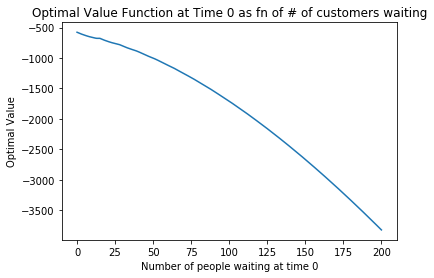

In [72]:
#Plot V at time 0 as a function of s
plt.clf()
xrange = list(range(0,201))
plt.xlabel("Number of people waiting at time 0")
plt.ylabel("Optimal Value")
plt.title("Optimal Value Function at Time 0 as fn of # of customers waiting")
plt.plot( xrange, V[0])
plt.show()

### b) Value Iteration

In [56]:
#Change nomenclature so you now get V_k+1(s) using reward + expectation V_k(s')
def getV(s_t, gamma, V_k):
    netval = []
    for a_t in A:
        #reward = r(s_t, a_t)
        if a_t == 1:
            #s_t = s_t - max(K, s_t)
            reward = -(c_h * (s_t - min(K, s_t))) - c_f
        else:
            reward = -c_h * s_t
        sum_expval = 0
        for A_t in list(range(1,6)):
            if a_t == 1:
                s_next = min((s_t - min(s_t, K) + A_t), 200)
            else:
                s_next = min(s_t + A_t, 200)
            sum_expval = sum_expval + 0.2 * (V_k[s_next])
        netval.append(reward + gamma*sum_expval)
    #print(netval)
    return max(netval)
    

In [61]:
V_k = [0] * n_states
Vnext = [0]*n_states
maxdiff = 10000
counter = 0
while (abs(maxdiff) > 10**(-6)):
    V_k = Vnext.copy()
    
    for s_t in range(0,201):
        Vnext[s_t] = getV(s_t, gamma, V_k)
    counter += 1    
    maxdiff = np.max(abs(np.array(Vnext) - np.array(V_k)))

print(maxdiff, counter)
print(Vnext) #seen to be the same as from enumeration

    

9.531704563414678e-07 340
[-576.6701496559987, -587.4441054062451, -597.7672676047805, -607.6052424939724, -616.8498001083645, -625.4396399735308, -633.6228198812261, -641.5733844391779, -648.857741910771, -654.9790507104292, -660.1230076849318, -666.1658720269903, -672.892145270503, -676.6701496559987, -676.6701496559987, -676.6701496559987, -687.4441054062451, -697.7672676047805, -707.6052424939724, -716.8498001083645, -725.4396399735308, -733.6228198812261, -741.5733844391779, -748.857741910771, -754.9790507104292, -760.1230076849318, -766.1658720269903, -772.892145270503, -780.769812909718, -790.4039464956677, -801.6701496559987, -812.4441054062451, -822.7672676047805, -832.6052424939724, -841.8498001083645, -850.4396399735308, -858.6228198812261, -866.5733844391779, -874.6366779289776, -883.3674081281729, -893.2613651026757, -904.0542294447341, -915.5305026882469, -927.3792343092551, -939.1539464956677, -950.4201496559988, -961.1941054062452, -971.5172676047806, -981.5032403374316

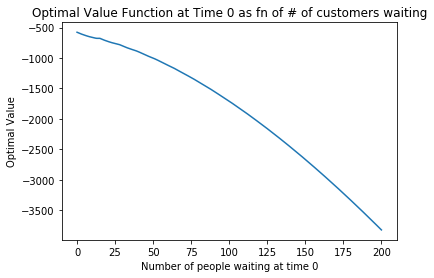

In [62]:
plt.clf()
xrange = list(range(0,201))
plt.xlabel("Number of people waiting at time 0")
plt.ylabel("Optimal Value")
plt.title("Optimal Value Function at Time 0 as fn of # of customers waiting")
plt.plot(xrange, Vnext)
plt.show()

### c) Policy Iteration

In [73]:
def getVal(s_t, gamma, V_k, pi):
#Function for value iteration, where action is decided by current policy.
    netval = []

    #DETERMINISTIC POLICY - PI(s) is 1 or 0 
    if pi == 1:
        
        reward = -(c_h * (s_t - min(K, s_t))) - c_f
    else:
        reward = -c_h * s_t
    sum_expval = 0
    for A_t in list(range(1,6)):
        if pi == 1:
            s_next = min((s_t - min(s_t, K) + A_t), 200)
        else:
            s_next = min(s_t + A_t, 200)
        sum_expval = sum_expval + 0.2 * (V_k[s_next])
    netval = (reward + gamma*sum_expval)
    #print(netval)
    return netval

In [74]:
def getPol(s_t, gamma, Vnext):
#Function to find the policy that maximizes value given current value function
    netval = []
    #Find value associated with taking every possible action
    for a_t in A:
        
        if a_t == 1:
            
            reward = -(c_h * (s_t - min(K, s_t))) - c_f
        else:
            reward = -c_h * s_t
        sum_expval = 0
        for A_t in list(range(1,6)):
            if a_t == 1:
                s_next = min((s_t - min(s_t, K) + A_t), 200)
            else:
                s_next = min(s_t + A_t, 200)
            sum_expval = sum_expval + 0.2 * (Vnext[s_next])
        netval.append(reward + gamma*sum_expval)
    pi = netval.index(max(netval))
    return pi

In [116]:
random.seed(5432)
pi = [round(random.random())]*n_states
V = [0]*n_states
pinext = [round(random.random())]*n_states
Vnext = [0]*n_states
maxdiff = 10000
counter = 0
polchanged = True
while polchanged == True:
    pi = pinext.copy()
    while (abs(maxdiff) > 10**(-6)):
        V_k = Vnext.copy()
        
        for s_t in range(0,201):
            Vnext[s_t] = getVal(s_t, gamma, V_k, pi[s_t])

        counter += 1    
        maxdiff = np.max(abs(np.array(Vnext) - np.array(V_k)))

    for s_t in range(0,201):
        pinext[s_t] = getPol(s_t, gamma, Vnext)

        counter += 1    
    diffP = np.sum(abs(np.array(pinext) - np.array(pi)))
    counter += 1 
    
    if diffP == 0:
        polchanged = False
    

print(pinext)
#print(sum(pinext))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
156


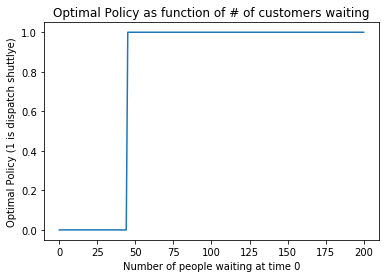

In [117]:
plt.clf()
xrange = list(range(0,201))
plt.xlabel("Number of people waiting at time 0")
plt.ylabel("Optimal Policy (1 is dispatch shuttlye)")
plt.title("Optimal Policy as function of # of customers waiting")
plt.plot(xrange, pinext)
plt.show()

We see that the policy resembles a step function - we do not dispatch the shuttle until a certain number of passengers are at the station, above which we always dispatch it.

# Part 2

### Enumeration

In [3]:
# Other parameters stay same
c_h = [-1,-1.5,-2,-2.5,-3]
n_states = 5
max_t = 500
arr_lb = 1
arr_ub = 5
K = 30

In [4]:
#state space
allstates = [[i,j,k,l,m] for i in range(0,n_states) for j in range(0,n_states) for k in range(0,n_states) \
             for l in range(0,n_states) for m in range(0,n_states)]                    
#empty v_k or v_t(s), v_k+1 or v_t+1(s)
Vnext = {tuple(i):0 for i in allstates}
V = {tuple(i):0 for i in allstates}
#Space of possible combinatons of arrivals
A_t = [(i,j,k,l,m) for i in range(arr_lb,arr_ub + 1) for j in range(arr_lb,arr_ub + 1) for k in range(arr_lb,arr_ub + 1) \
             for l in range(arr_lb,arr_ub + 1) for m in range(arr_lb,arr_ub + 1)]
#Number of possible combinations for the environment
numEnv = len(A_t)

In [5]:
def get_value(s_t, gamma, V_next):
    #Value function
    netval = []
    for a_t in A:
        sprime = s_t.copy()
        if a_t == 1:
            #Load the bus up to max of 15, most expensive passenger to make wait first
            itr = 4
            left = K
            while (left > 0) & (itr > 0):
                countdown = min(left, s_t[itr])
                sprime[itr] = s_t[itr] - countdown
                left = left - countdown
                itr = itr - 1
            #Compute reward based on how many passengers remain    
            reward = sum([a*b for a,b in zip(c_h, sprime)]) - c_f
            
            
        else:
            #Reward if no shuttle dispatch
            reward = sum([a*b for a,b in zip(c_h, s_t)])
        sum_expval = 0
        
        for env in A_t:
            #Get s' based on how many people arrive
            s_next = [min(a+b, n_states - 1) for a,b in zip(sprime, env)]
                     
            sum_expval = sum_expval + (1/numEnv) * (V_next[tuple(s_next)])
        #Expected value
        netval.append(reward + gamma*sum_expval)
      
    return max(netval)
                

In [6]:

for t in range(max_t, -1, -1):
    for s_t in allstates:
        Vnext = V.copy()
        V[tuple(s_t)] = get_value(s_t, gamma, Vnext)

print(V)

{(0, 0, 0, 0, 0): -747.0874099944572, (0, 0, 0, 0, 1): -752.1428869944615, (0, 0, 0, 0, 2): -756.3911869944637, (0, 0, 0, 0, 3): -759.961186994462, (0, 0, 0, 0, 4): -762.961186994462, (0, 0, 0, 1, 0): -751.3003074944601, (0, 0, 0, 1, 1): -756.3557844944645, (0, 0, 0, 1, 2): -760.6040844944669, (0, 0, 0, 1, 3): -764.1740844944651, (0, 0, 0, 1, 4): -767.1740844944651, (0, 0, 0, 2, 0): -754.8405574944626, (0, 0, 0, 2, 1): -759.8960344944675, (0, 0, 0, 2, 2): -764.1443344944698, (0, 0, 0, 2, 3): -767.7143344944682, (0, 0, 0, 2, 4): -770.7143344944682, (0, 0, 0, 3, 0): -757.8155574944637, (0, 0, 0, 3, 1): -762.8710344944711, (0, 0, 0, 3, 2): -767.1193344944738, (0, 0, 0, 3, 3): -770.6893344944731, (0, 0, 0, 3, 4): -773.6893344944731, (0, 0, 0, 4, 0): -760.3155574944637, (0, 0, 0, 4, 1): -765.3710344944711, (0, 0, 0, 4, 2): -769.6193344944738, (0, 0, 0, 4, 3): -773.1893344944731, (0, 0, 0, 4, 4): -776.1893344944731, (0, 0, 1, 0, 0): -750.4577279944568, (0, 0, 1, 0, 1): -755.5132049944591, (0

We plot against the number of people of the first type waiting, fixing the others at 3,3,4,4. ie. (i,3,3,4,4)

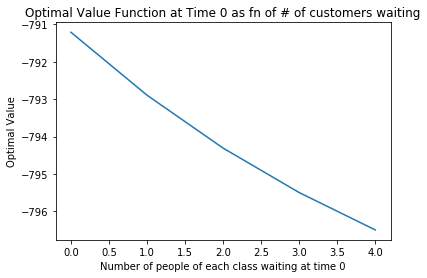

In [8]:
plt.clf()
xrange = [i for i in range(0,n_states)]
plotrange = [(i,3,3,4,4) for i in range(0,n_states)]
plt.xlabel("Number of people of each class waiting at time 0")
plt.ylabel("Optimal Value")
plt.title("Optimal Value Function at Time 0 as fn of # of customers waiting")
plt.plot(xrange, [V[k] for k in plotrange])
plt.show()

### Value Iteration

In [9]:
allstates = [[i,j,k,l,m] for i in range(0,n_states) for j in range(0,n_states) for k in range(0,n_states) \
             for l in range(0,n_states) for m in range(0,n_states)]                    
Vnext = {tuple(i):0 for i in allstates}
V = {tuple(i):0 for i in allstates}
A_t = [(i,j,k,l,m) for i in range(arr_lb,arr_ub + 1) for j in range(arr_lb,arr_ub + 1) for k in range(arr_lb,arr_ub + 1) \
             for l in range(arr_lb,arr_ub + 1) for m in range(arr_lb,arr_ub + 1)]
numEnv = len(A_t)

In [10]:
def get_value(s_t, gamma, V_k):
    netval = []
    for a_t in A:
        sprime = s_t.copy()
        if a_t == 1:
            itr = 4
            left = K
            while (left > 0) & (itr > 0):
                countdown = min(left, s_t[itr])
                sprime[itr] = s_t[itr] - countdown
                left = left - countdown
                itr = itr - 1
                
            reward = sum([a*b for a,b in zip(c_h, sprime)]) - c_f
            
            
        else:
            reward = sum([a*b for a,b in zip(c_h, s_t)])
        sum_expval = 0
        
        for env in A_t:
            s_next = [min(a+b, n_states - 1) for a,b in zip(sprime, env)]
                     
            sum_expval = sum_expval + (1/numEnv) * (V_k[tuple(s_next)])
        netval.append(reward + gamma*sum_expval)
      
    return max(netval)

In [11]:
counter = 0
maxdiff = 100
while (abs(maxdiff) > 10**(-6)):
    V = Vnext.copy()
    maxdiff = 0
    for s_t in allstates:
        Vnext[tuple(s_t)] = get_value(s_t, gamma, V)
        maxdiff = max(maxdiff, abs(Vnext[tuple(s_t)] - V[tuple(s_t)]))
    counter += 1
    
    if counter == 100:
        break
    

print(maxdiff)
print(V)

0.24928544091153526
{(0, 0, 0, 0, 0): -742.1017011829408, (0, 0, 0, 0, 1): -747.1571781829359, (0, 0, 0, 0, 2): -751.4054781829358, (0, 0, 0, 0, 3): -754.9754781829326, (0, 0, 0, 0, 4): -757.9754781829326, (0, 0, 0, 1, 0): -746.31459868294, (0, 0, 0, 1, 1): -751.3700756829346, (0, 0, 0, 1, 2): -755.6183756829348, (0, 0, 0, 1, 3): -759.1883756829319, (0, 0, 0, 1, 4): -762.1883756829319, (0, 0, 0, 2, 0): -749.8548486829385, (0, 0, 0, 2, 1): -754.9103256829329, (0, 0, 0, 2, 2): -759.1586256829336, (0, 0, 0, 2, 3): -762.7286256829312, (0, 0, 0, 2, 4): -765.7286256829312, (0, 0, 0, 3, 0): -752.829848682939, (0, 0, 0, 3, 1): -757.8853256829332, (0, 0, 0, 3, 2): -762.1336256829337, (0, 0, 0, 3, 3): -765.7036256829314, (0, 0, 0, 3, 4): -768.7036256829314, (0, 0, 0, 4, 0): -755.329848682939, (0, 0, 0, 4, 1): -760.3853256829332, (0, 0, 0, 4, 2): -764.6336256829337, (0, 0, 0, 4, 3): -768.2036256829314, (0, 0, 0, 4, 4): -771.2036256829314, (0, 0, 1, 0, 0): -745.4720191829402, (0, 0, 1, 0, 1): -750

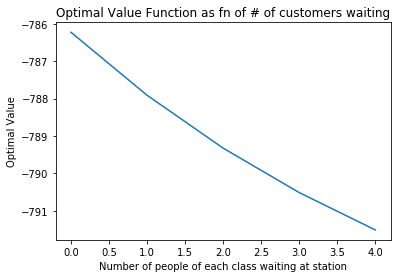

In [13]:
plt.clf()
xrange = list(range(0,n_states))
plotrange = [(i,3,3,4,4) for i in range(0,n_states)]
plt.xlabel("Number of people of each class waiting at station")
plt.ylabel("Optimal Value")
plt.title("Optimal Value Function as fn of # of customers waiting")
plt.plot(xrange, [V[k] for k in plotrange])
plt.show()

### Policy Iteration

In [14]:
allstates = [[i,j,k,l,m] for i in range(0,n_states) for j in range(0,n_states) for k in range(0,n_states) \
             for l in range(0,n_states) for m in range(0,n_states)]                    
Vnext = {tuple(i):0 for i in allstates}
V = {tuple(i):0 for i in allstates}
A_t = [(i,j,k,l,m) for i in range(arr_lb,arr_ub + 1) for j in range(arr_lb,arr_ub + 1) for k in range(arr_lb,arr_ub + 1) \
             for l in range(arr_lb,arr_ub + 1) for m in range(arr_lb,arr_ub + 1)]
pinext = {tuple(i):round(random.random()) for i in allstates}
pi = {tuple(i):round(random.random()) for i in allstates}
numEnv = len(A_t)

In [15]:
def get_value(s_t, gamma, V_k, a_t):
    netval = []
    a_t
    sprime = s_t.copy()
    if a_t == 1:
        itr = 4
        left = K
        while (left > 0) & (itr > 0):
            countdown = min(left, s_t[itr])
            sprime[itr] = s_t[itr] - countdown
            left = left - countdown
            itr = itr - 1

        reward = sum([a*b for a,b in zip(c_h, sprime)]) - c_f


    else:
        reward = sum([a*b for a,b in zip(c_h, s_t)])
    sum_expval = 0

    for env in A_t:
        s_next = [min(a+b, n_states - 1) for a,b in zip(sprime, env)]

        sum_expval = sum_expval + (1/numEnv) * (V_k[tuple(s_next)])
    netval = reward + gamma*sum_expval

    return netval

In [16]:
def get_Pol(s_t, gamma, Vnext):
    netval = []
    a_t
    sprime = s_t.copy()
    for a_t in range(2):
        
        if a_t == 1:
            itr = 4
            left = K
            while (left > 0) & (itr > 0):
                countdown = min(left, s_t[itr])
                sprime[itr] = s_t[itr] - countdown
                left = left - countdown
                itr = itr - 1

            reward = sum([a*b for a,b in zip(c_h, sprime)]) - c_f


        else:
            reward = sum([a*b for a,b in zip(c_h, s_t)])
        sum_expval = 0

        for env in A_t:
            s_next = [min(a+b, n_states - 1) for a,b in zip(sprime, env)]

            sum_expval = sum_expval + (1/numEnv) * (Vnext[tuple(s_next)])
    pi = netval.index(max(netval))
    return pi

In [ ]:
polChanged = True
maxdiff = 10
maxpoldiff = 1000
counter = 0
while maxpoldiff > 0:
    pi = pinext.copy()
    while (abs(maxdiff) > 10**(-6)):
        maxdiff = 0
        V_k = Vnext.copy()
        for s_t in allstates:
            Vnext[tuple(s_t)] = get_value(s_t, gamma, V, pi[tuple(s_t)])
            maxdiff = max(maxdiff, abs(Vnext[tuple(s_t)] - V[tuple(s_t)]))
    for s_t in allstates:
        pinext[tuple(s_t)] = getPol(s_t, gamma, Vnext)
        maxpoldiff = max(maxpoldiff, abs(pinext[tuple(s_t)] - pi[tuple(s_t)]))
    counter += 1
    if counter == 100:
        break
print(pinext)
        
    

In [ ]:
plt.clf()
xrange = list(range(0,n_states))
plotrange = [(i,3,3,4,4) for i in range(0,n_states)]
plt.xlabel("Number of people of each class waiting at time 0")
plt.ylabel("Action to take")
plt.title("Policy as fn of # of customers waiting")
plt.plot(xrange, [pinext[k] for k in plotrange])
plt.show()

We clearly see that we can't solve the second problem with manual enumeration, even with a small number of arrivals, such as 5